In [11]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("run_or_walk.csv")
df.shape

(88588, 11)

In [7]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


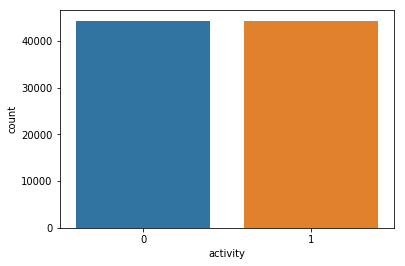

In [12]:
sns.countplot('activity', data =df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
date              88588 non-null object
time              88588 non-null object
username          88588 non-null object
wrist             88588 non-null int64
activity          88588 non-null int64
acceleration_x    88588 non-null float64
acceleration_y    88588 non-null float64
acceleration_z    88588 non-null float64
gyro_x            88588 non-null float64
gyro_y            88588 non-null float64
gyro_z            88588 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [13]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, 5:].values,df.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
print(X_train.shape)
print(y_test[0:10])

(70870, 6)
[1 0 0 1 1 1 0 1 1 1]


In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [17]:
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
y_predict = classifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy = accuracy_score(y_predict,y_test)

In [21]:
print(accuracy)

0.9554690145614629


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
conf_mat =confusion_matrix(y_predict,y_test)

In [24]:
print(conf_mat)

[[8583  699]
 [  90 8346]]


In [25]:
from sklearn.metrics import classification_report
target_names = ["Walk","Run"]

In [26]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

        Walk       0.92      0.99      0.96      8673
         Run       0.99      0.92      0.95      9045

   micro avg       0.96      0.96      0.96     17718
   macro avg       0.96      0.96      0.96     17718
weighted avg       0.96      0.96      0.96     17718



In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
date              88588 non-null object
time              88588 non-null object
username          88588 non-null object
wrist             88588 non-null int64
activity          88588 non-null int64
acceleration_x    88588 non-null float64
acceleration_y    88588 non-null float64
acceleration_z    88588 non-null float64
gyro_x            88588 non-null float64
gyro_y            88588 non-null float64
gyro_z            88588 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [28]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, [5,6,7]].values,df.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
accuracy_score(y_predict,y_test)

0.9565978101365843

In [30]:
print(conf_mat)

[[8583  699]
 [  90 8346]]
